<a href="https://colab.research.google.com/github/varunbommagunta/Machine_Learning/blob/main/Dimensionality_Reduction/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Principal Component Analysis (PCA)

In [1]:
from sklearn.datasets import load_breast_cancer   #load the data

In [2]:
data = load_breast_cancer()

In [3]:
dir(data)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [4]:
X = data.data

In [5]:
y = data.target

In [6]:
X.shape

(569, 30)

In [7]:
y.shape

(569,)

In [8]:
import pandas as pd
import numpy as np

In [9]:
df = pd.DataFrame(X,y,columns = [data.feature_names]).reset_index()

In [10]:
df.head()

,index,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
df.rename(columns = {'index':'target'},inplace = True)

In [12]:
df.corr()   #Check the correlations

,target,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
target,1.000000,-0.730029,-0.415185,-0.742636,-0.708984,-0.358560,-0.596534,-0.696360,-0.776614,-0.330499,0.012838,-0.567134,0.008303,-0.556141,-0.548236,0.067016,-0.292999,-0.253730,-0.408042,0.006522,-0.077972,-0.776454,-0.456903,-0.782914,-0.733825,-0.421465,-0.590998,-0.659610,-0.793566,-0.416294,-0.323872
mean radius,-0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
mean texture,-0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
mean perimeter,-0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
mean area,-0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
mean smoothness,-0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
mean compactness,-0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
mean concavity,-0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
mean concave points,-0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
mean symmetry,-0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


In [13]:
from sklearn.preprocessing import StandardScaler  #Standardize features by removing the mean and scaling to unit variance

In [14]:
scale = StandardScaler()

In [15]:
X_scaled = scale.fit_transform(X)

In [16]:
from sklearn.decomposition import PCA

In [17]:
pca = PCA(n_components = 2)  #for 2 principal components

In [18]:
red_data = pca.fit_transform(X_scaled)  #Transform our data

In [19]:
pca.explained_variance_ratio_   #Check the variance of our pc's
                                #Here we only gained 52% of our data

array([0.44272026, 0.18971182])

In [20]:
pca = PCA(n_components = 0.80)  #This is another syntax specifying to take n pcs whose gain is 80%

In [21]:
red_data = pca.fit_transform(X_scaled)

In [22]:
pca.explained_variance_ratio_

array([0.44272026, 0.18971182, 0.09393163, 0.06602135, 0.05495768])

In [23]:
pca.explained_variance_ratio_.sum()  #As we can see that about 80% of our data is preserved

0.8473427431680723

In [24]:
pca_2d = PCA(n_components = 2)                #lets plot the data in 2D and 3D
red_data_2D = pca_2d.fit_transform(X_scaled)

In [25]:
red_data_2D.shape

(569, 2)

In [26]:
pc1 = red_data_2D[:,0]
pc2 = red_data_2D[:,1]

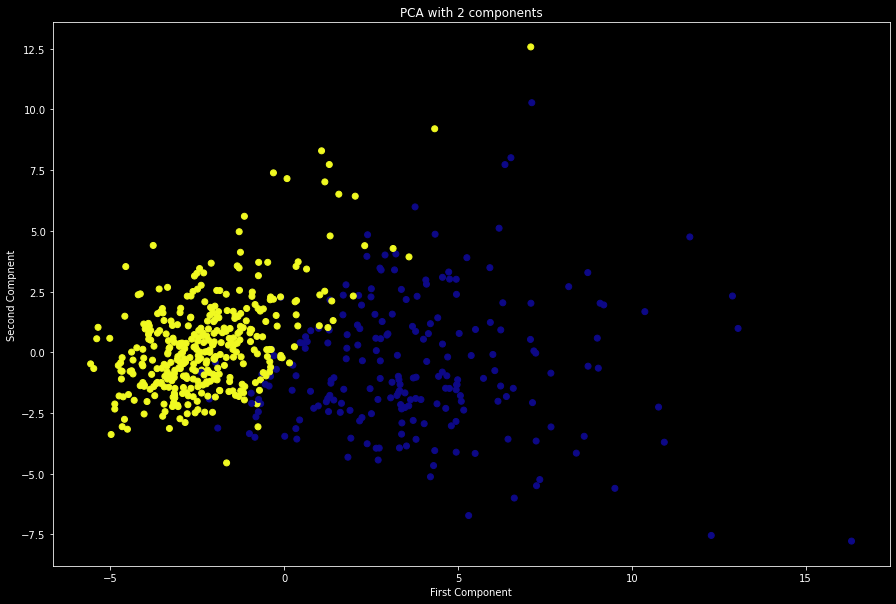

In [27]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')
plt.figure(figsize = (15,10))
plt.scatter(pc1,pc2,c = data.target,cmap = 'plasma')
plt.xlabel("First Component")
plt.ylabel("Second Compnent")
plt.title("PCA with 2 components")
plt.show()

In [28]:
pca_3d = PCA(n_components = 3)  #in 3D
red_data_3D = pca_3d.fit_transform(X_scaled)

In [29]:
pc1 = red_data_3D[:,0]
pc2 = red_data_3D[:,1]
pc3 = red_data_3D[:,2]

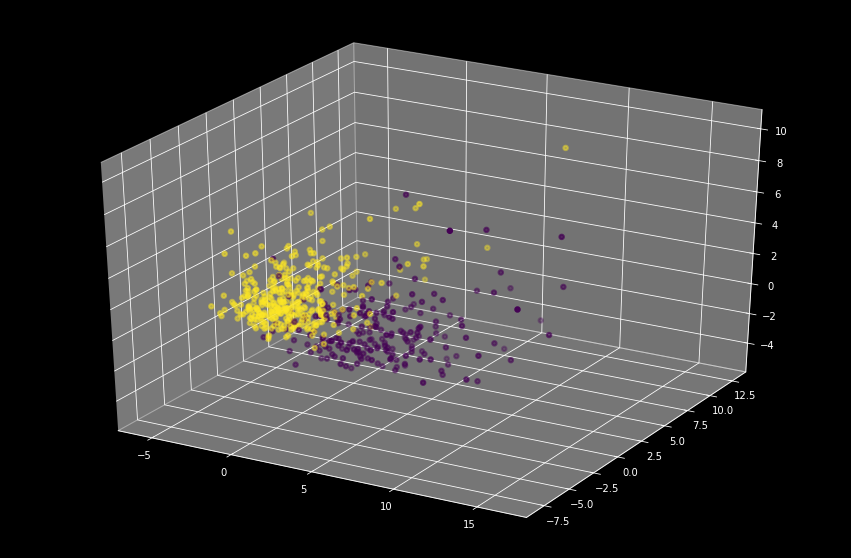

In [30]:
plt.figure(figsize = (15,10))
ax = plt.axes(projection='3d')
ax.scatter(pc1,pc2,pc3, c=data.target, cmap='viridis', linewidth=2)
#ax.view_init(40, 70);

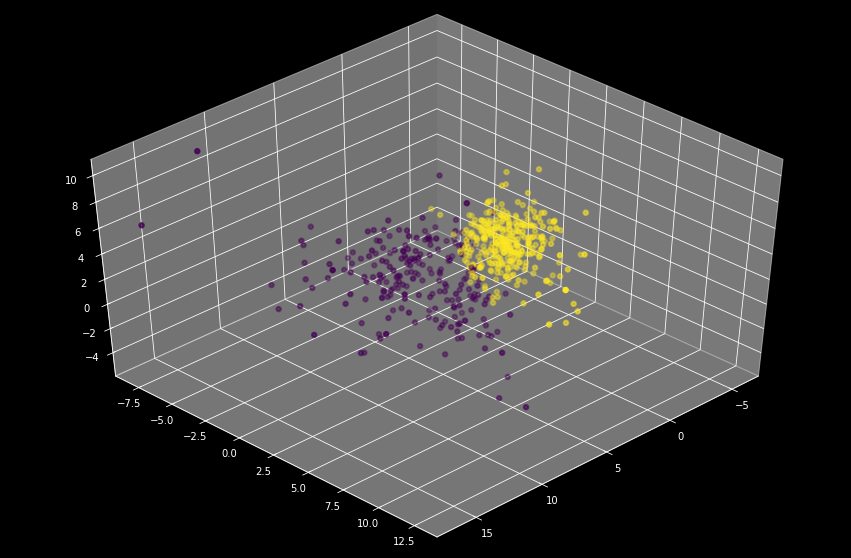

In [31]:
plt.figure(figsize = (15,10))         #another view
ax = plt.axes(projection='3d')
ax.scatter(pc1,pc2,pc3, c=data.target, cmap='viridis', linewidth=2)
ax.view_init(45,45);